<H1 align="center"> Análisis del usuario @AlanGarciaPeru <br> <br> Twitter y herramientas de BigData para explorar datos </center></H1> <br> <br><br> 

<center> Roque Leal </center> 
<center>DataScience </center> <br> 

## Resumen

El presente Jupyter Notebook  correponde a una exploración de los datos en la red social Twitter asociados al usuario [@AlanGarciaPeru](https://twitter.com/AlanGarciaPeru), lamentando los hechos de los sucesos que desencadenaron en el fallecimiento del Ciudadano Ex-Presidente del Perú, se realiza el informe como una aproximación científica de diferentes métodos para colectar y analizar datos en Twitter basado en las herramientas disponibles de Python para presentar resultados.

In [1]:
import tweepy           # Para consumir la API de Twitter
import pandas as pd     # Para manejo de datos
import numpy as np      # Para operaciones numéricas

# Para ploteo y visualización:
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

##  App de Twitter

Para poder extraer tweets de la cuenta @AlanGarciaPeru para un posterior análisis, creamos una aplicación basados en los servicios de Twitter. El sitio para poder hacer eso es [https://apps.twitter.com/](https://apps.twitter.com/).

De esta app utilizaremos la siguiente información:
* Consumer Key (API Key)
* Consumer Secret (API Secret)
* Access Token
* Access Token Secret

Ahora comenzaremos a a consumir el API de Twitter. Para ello, creamos una función que nos permita autenticar nuestras llaves de acceso y consumo.

In [3]:
from credentials import *
def twitter_config():

    # Autenticar y acceder usando llaves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Regresar acceso al API:
    api = tweepy.API(auth)
    return api

## Extraemos tweets

Ahora se construye un extractor de datos de Twitter para el usuario de @AlanGarciaPeru, usando el API Rest de Twitter para crear una ventana de búsqueda en el pasado de unos 60 días contados desde hoy 18 de abril del 2019 y utilizando la cuenta de   ([@AlanGarciaPeru](https://twitter.com/AlanGarciaPeru)) como usuario a minar. A manera de un ejercicio práctico sólo analizaremos los últimos 200 tweets dentro de la ventana de tiempo que nos permite twitter


<!-- <iframe src='https://twitter.com/AlanGarciaPeru' width=700 height=350></iframe> -->

In [4]:
extractor = twitter_config()

# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name="AlanGarciaPeru", count=200)
print("Tweets obtenidos: {}.\n".format(len(tweets)))

# Imprimimos los primeros 5 tweets:
print("Los primeros 5 tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets obtenidos: 196.

Los primeros 5 tweets:

RT @josepimentelali: Revisado informe IDL, no se observa elemento fáctico alguno que vincule al ex presidente Alan García, reconocido por s…

Como en ningún documento se me menciona y ningún indicio ni evidencia me alcanza sólo les queda la ESPECULACIÓN o i… https://t.co/7vEqmBOcLF

RT @ShiraishiJose: @AlanGarciaPeru Entonces ya dejaron de lado el pago de la conferencia del 2012. No encontraron nada. Ahora otro libreto…

RT @ereynaabogado: En la fecha he pedido al Fiscal Pérez, para poder ejercer derecho de defensa, precise q hechos amparan su pedido para q…

RT @diariocorreo: Más de 429 mil personas buscaron empleo en Lima Metropolitana sin conseguirlo
https://t.co/pczyteGbq4 Por @mclaudiamedina



## Creamos un Dataframe

Esto nos permite tener un ploteo más amigable usando el método head para visualizar sólo los primeros 10 tweets de la cuenta  @AlanGarciaPeru (o el número que elementos que se le pasen como argumento).

In [5]:
datos = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(datos.head(10))

,Tweets
0,"RT @josepimentelali: Revisado informe IDL, no ..."
1,Como en ningún documento se me menciona y ning...
2,RT @ShiraishiJose: @AlanGarciaPeru Entonces ya...
3,RT @ereynaabogado: En la fecha he pedido al Fi...
4,RT @diariocorreo: Más de 429 mil personas busc...
5,Mis compañeros pueden tener confianza. Nunca h...
6,Ante las nuevas denuncias contra los Señores N...
7,https://t.co/lebEG41eNz
8,Como la Fiscalía no encuentra nada ilícito en ...
9,RT @primerafuente1: Vizcarra se pregunta: \n¿Q...


Vamos agregar nuevos elementos de los tweets para explorar las caracteristicas de cada tweet

In [6]:
# Añadimos datos relevantes:
datos['len'] = np.array([len(tweet.text) for tweet in tweets])
datos['ID']  = np.array([tweet.id for tweet in tweets])
datos['Creado'] = np.array([tweet.created_at for tweet in tweets])
datos['Fuente'] = np.array([tweet.source for tweet in tweets])
datos['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
datos['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [7]:
display(datos.head(10))

,Tweets,len,ID,Creado,Fuente,Likes,RTs
0,"RT @josepimentelali: Revisado informe IDL, no ...",140,1118255719046897664,2019-04-16 20:51:54,Twitter for iPhone,0,222
1,Como en ningún documento se me menciona y ning...,140,1118128949920436224,2019-04-16 12:28:10,Twitter for iPhone,3201,1269
2,RT @ShiraishiJose: @AlanGarciaPeru Entonces ya...,139,1117983375682355201,2019-04-16 02:49:42,Twitter for iPhone,0,73
3,RT @ereynaabogado: En la fecha he pedido al Fi...,139,1117868987675578368,2019-04-15 19:15:10,Twitter for iPhone,0,197
4,RT @diariocorreo: Más de 429 mil personas busc...,139,1117864966843981825,2019-04-15 18:59:11,Twitter for iPhone,0,58
5,Mis compañeros pueden tener confianza. Nunca h...,140,1117818245065711618,2019-04-15 15:53:32,Twitter for iPhone,1667,543
6,Ante las nuevas denuncias contra los Señores N...,140,1117794629125050373,2019-04-15 14:19:41,Twitter for iPhone,753,264
7,https://t.co/lebEG41eNz,23,1117578320147820544,2019-04-15 00:00:09,Twitter for iPhone,210,73
8,Como la Fiscalía no encuentra nada ilícito en ...,140,1117465992941142018,2019-04-14 16:33:48,Twitter for iPhone,506,221
9,RT @primerafuente1: Vizcarra se pregunta: \n¿Q...,140,1117465644205772801,2019-04-14 16:32:25,Twitter for iPhone,0,138


## Descripción básica

En este apartado investigaremos sobre estadísticos básicos de la información minada, como la media de las longitudes de cada tweet, cuál fue el tweet con más favoritos, cuál fue el tweet más retweeteado, etc.

In [10]:
# Extraemos el promedio:
media = np.mean(datos['len'])

print("El promedio de caracteres en tweets: {}".format(media))

# Extraemos el tweet con más FAVs y con más RTs:
fav_max = np.max(datos['Likes'])
rt_max  = np.max(datos['RTs'])

fav = datos[datos.Likes == fav_max].index[0]
rt  = datos[datos.RTs == rt_max].index[0]

# Max FAVs:
print("El tweet con más likes es: \n{}".format(datos['Tweets'][fav]))
print("Número de likes: {}".format(fav_max))
print("{} caracteres.\n".format(datos['len'][fav]))

# Max RTs:
print("El tweet con más retweets es: \n{}".format(datos['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(datos['len'][rt]))


El promedio de caracteres en tweets: 123.58163265306122
El tweet con más likes es: 
Como en ningún documento se me menciona y ningún indicio ni evidencia me alcanza sólo les queda la ESPECULACIÓN o i… https://t.co/7vEqmBOcLF
Número de likes: 3201
140 caracteres.

El tweet con más retweets es: 
Como en ningún documento se me menciona y ningún indicio ni evidencia me alcanza sólo les queda la ESPECULACIÓN o i… https://t.co/7vEqmBOcLF
Número de retweets: 1269
140 caracteres.



## Series de tiempo

Teniendo los tweets como vectores basado en las fechas de creación, podemos construir una serie de tiempo con respecto a longitudes de tweets, favoritos y retweets.

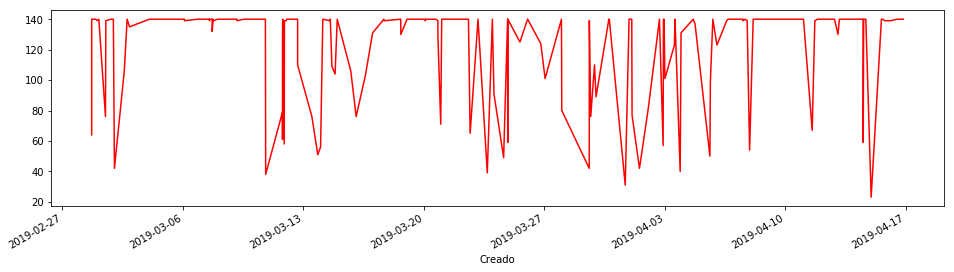

In [12]:
# Creamos series de tiempo para datos:
tlen = pd.Series(data=datos['len'].values, index=datos['Creado'])
tfav = pd.Series(data=datos['Likes'].values, index=datos['Creado'])
tret = pd.Series(data=datos['RTs'].values, index=datos['Creado'])
tlen.plot(figsize=(16,4), color='r');

En este caso observamos que la cuenta @AlanGarciaPeru mantiene un comportamiento constante aunque los días cercanos al 17 de abril su frecuencia disminuyó si comparamos con las semanas de marzo

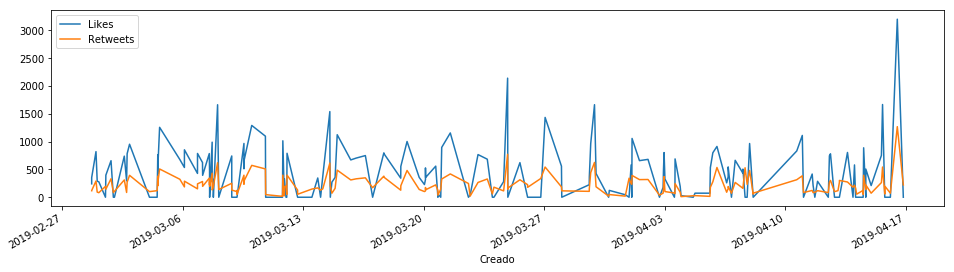

In [13]:
# Visualización de likes vs retweets:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

Presentando una gráfica de las interacciones causadas por cada tweet de la cuenta @AlanGarciaPeru, observamos los likes y retweets originados, los cuales alcanzaron una audiencia de hasta 4000 cuentas que interactuaron 

## Pie charts de dispositivos

Basados en los metadatos de la tweets de @AlanGarciaPeru es propicia la ocasión de conocer desde que dispositivo fue creado, en este caso la totalidad ha tenido por origen el dispositivo Iphone del usuario, como lo vemos en la siguiente gráfica.

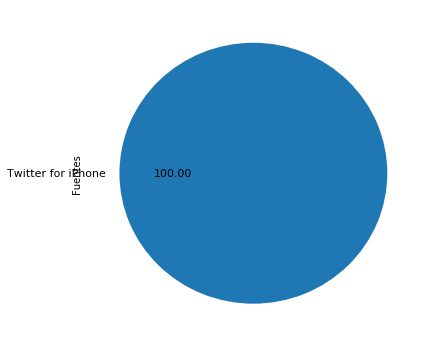

In [14]:
fuentes = []
for fuente in datos['Fuente']:
    if fuente not in fuentes:
        fuentes.append(fuente)
percent = np.zeros(len(fuentes))

for fuente in datos['Fuente']:
    for index in range(len(fuentes)):
        if fuente == fuentes[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=fuentes, name='Fuentes')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## Análisis de sentimientos

Utilizando la libreria de TexBlob, se realiza el análisis de sentimientos para el usuario

In [17]:
from textblob import TextBlob
import re

def limpia_tweet(tweet):
   
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analiza_sentimiento(tweet):
    
    analysis = TextBlob(limpia_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

datos['AdS'] = np.array([ analiza_sentimiento(tweet) for tweet in datos['Tweets'] ])
display(datos.head(10))

,Tweets,len,ID,Creado,Fuente,Likes,RTs,AdS
0,"RT @josepimentelali: Revisado informe IDL, no ...",140,1118255719046897664,2019-04-16 20:51:54,Twitter for iPhone,0,222,0
1,Como en ningún documento se me menciona y ning...,140,1118128949920436224,2019-04-16 12:28:10,Twitter for iPhone,3201,1269,0
2,RT @ShiraishiJose: @AlanGarciaPeru Entonces ya...,139,1117983375682355201,2019-04-16 02:49:42,Twitter for iPhone,0,73,0
3,RT @ereynaabogado: En la fecha he pedido al Fi...,139,1117868987675578368,2019-04-15 19:15:10,Twitter for iPhone,0,197,1
4,RT @diariocorreo: Más de 429 mil personas busc...,139,1117864966843981825,2019-04-15 18:59:11,Twitter for iPhone,0,58,0
5,Mis compañeros pueden tener confianza. Nunca h...,140,1117818245065711618,2019-04-15 15:53:32,Twitter for iPhone,1667,543,0
6,Ante las nuevas denuncias contra los Señores N...,140,1117794629125050373,2019-04-15 14:19:41,Twitter for iPhone,753,264,0
7,https://t.co/lebEG41eNz,23,1117578320147820544,2019-04-15 00:00:09,Twitter for iPhone,210,73,0
8,Como la Fiscalía no encuentra nada ilícito en ...,140,1117465992941142018,2019-04-14 16:33:48,Twitter for iPhone,506,221,0
9,RT @primerafuente1: Vizcarra se pregunta: \n¿Q...,140,1117465644205772801,2019-04-14 16:32:25,Twitter for iPhone,0,138,0


Clasificamos los tweets y construimos una lista con todos los tweets clasificados, reportando los porcentajes del análisis realizado.

In [18]:
tweets_positivos = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] > 0]
tweets_neutros   = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] == 0]
tweets_negativos = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] < 0]
print("Porcentaje de tweets positivos: {}%".format(len(tweets_positivos)*100/len(datos['Tweets'])))
print("Porcentaje de tweets neutros: {}%".format(len(tweets_neutros)*100/len(datos['Tweets'])))
print("Porcentaje de tweets negativos: {}%".format(len(tweets_negativos)*100/len(datos['Tweets'])))

Porcentaje de tweets positivos: 6.63265306122449%
Porcentaje de tweets neutros: 92.34693877551021%
Porcentaje de tweets negativos: 1.0204081632653061%


Basados en la totalidad de tweets publicados los últimos tres meses en la cuenta ([@AlanGarciaPeru](https://twitter.com/AlanGarciaPeru)) se observa mayormente comentarios neutros en un 92%, precedidos en una menor proporción de comentarios positivos en un 6% y finalmente sólo 1% las publicaciones reflejan un sentimiento negativo por parte del autor.

## Repercusiones

Luego del lamentable acontecimiento del usuario ([@AlanGarciaPeru](https://twitter.com/AlanGarciaPeru)) el día de ayer [17 de abril del 2019](https://cnnespanol.cnn.com/2019/04/17/fallecio-el-expresidente-de-peru-alan-garcia-muere-suicidio/), exploremos las repercusiones por parte de otros usuarios en Twitter a manera de conocer las repercuciones en cuanto a los nodos de interacción utilizando un Grafo y por otra parte conociendo el contenido de estas interacciones con una nube de palabras

In [24]:
import analisis_twitter as at

Populating the interactive namespace from numpy and matplotlib


Extraemos el contenido de más de 4 Millones de tweets de diferente usuarios en la red social a manera de hacer un grafo de interacciones y una nube de palabras del contenido expresado en estos tweets  

Término de búsqueda: @AlanGarciaPeru


'mariellawoodman mlukacs acuerdo miklos hay puntos quiebre sucedido alan muy grave hemos s hurgamemoriape ahora adelante toca defender extraordinario trabajo vienen realizando rafael vela josé domingo perez eq romancendoya cambió criterio josedomingoperez sobre ppk tras suicidio evidencia arbitrariedad l cómo posible vizcarra use procurador enco empleado villararán procurador humala cat waykaperu apristas algunos periodistas hacen campaña sea mártir pueblo peruano responde sin antoniodurand3 kenjifujimorih jajajaja calla viejo hipócrita carloslinaresh larazon_pe no alegra sino entristece cobardía vergüenza nivel mundial x rdej65t3gx fernandoarmasca pbodigital cuando cambiaste tanto fernando fiscalía no encuentra nada ilícito concesión pto paita rabiosos llaman blindaje archiv mlukacs congresoperu uds representan elegimos defender patria sus interéses qduhumy8sd romancendoya fiscalía política confunden todo independencia poder martinvizcarrac ellos cargaron derribando hurgamemoriape dia

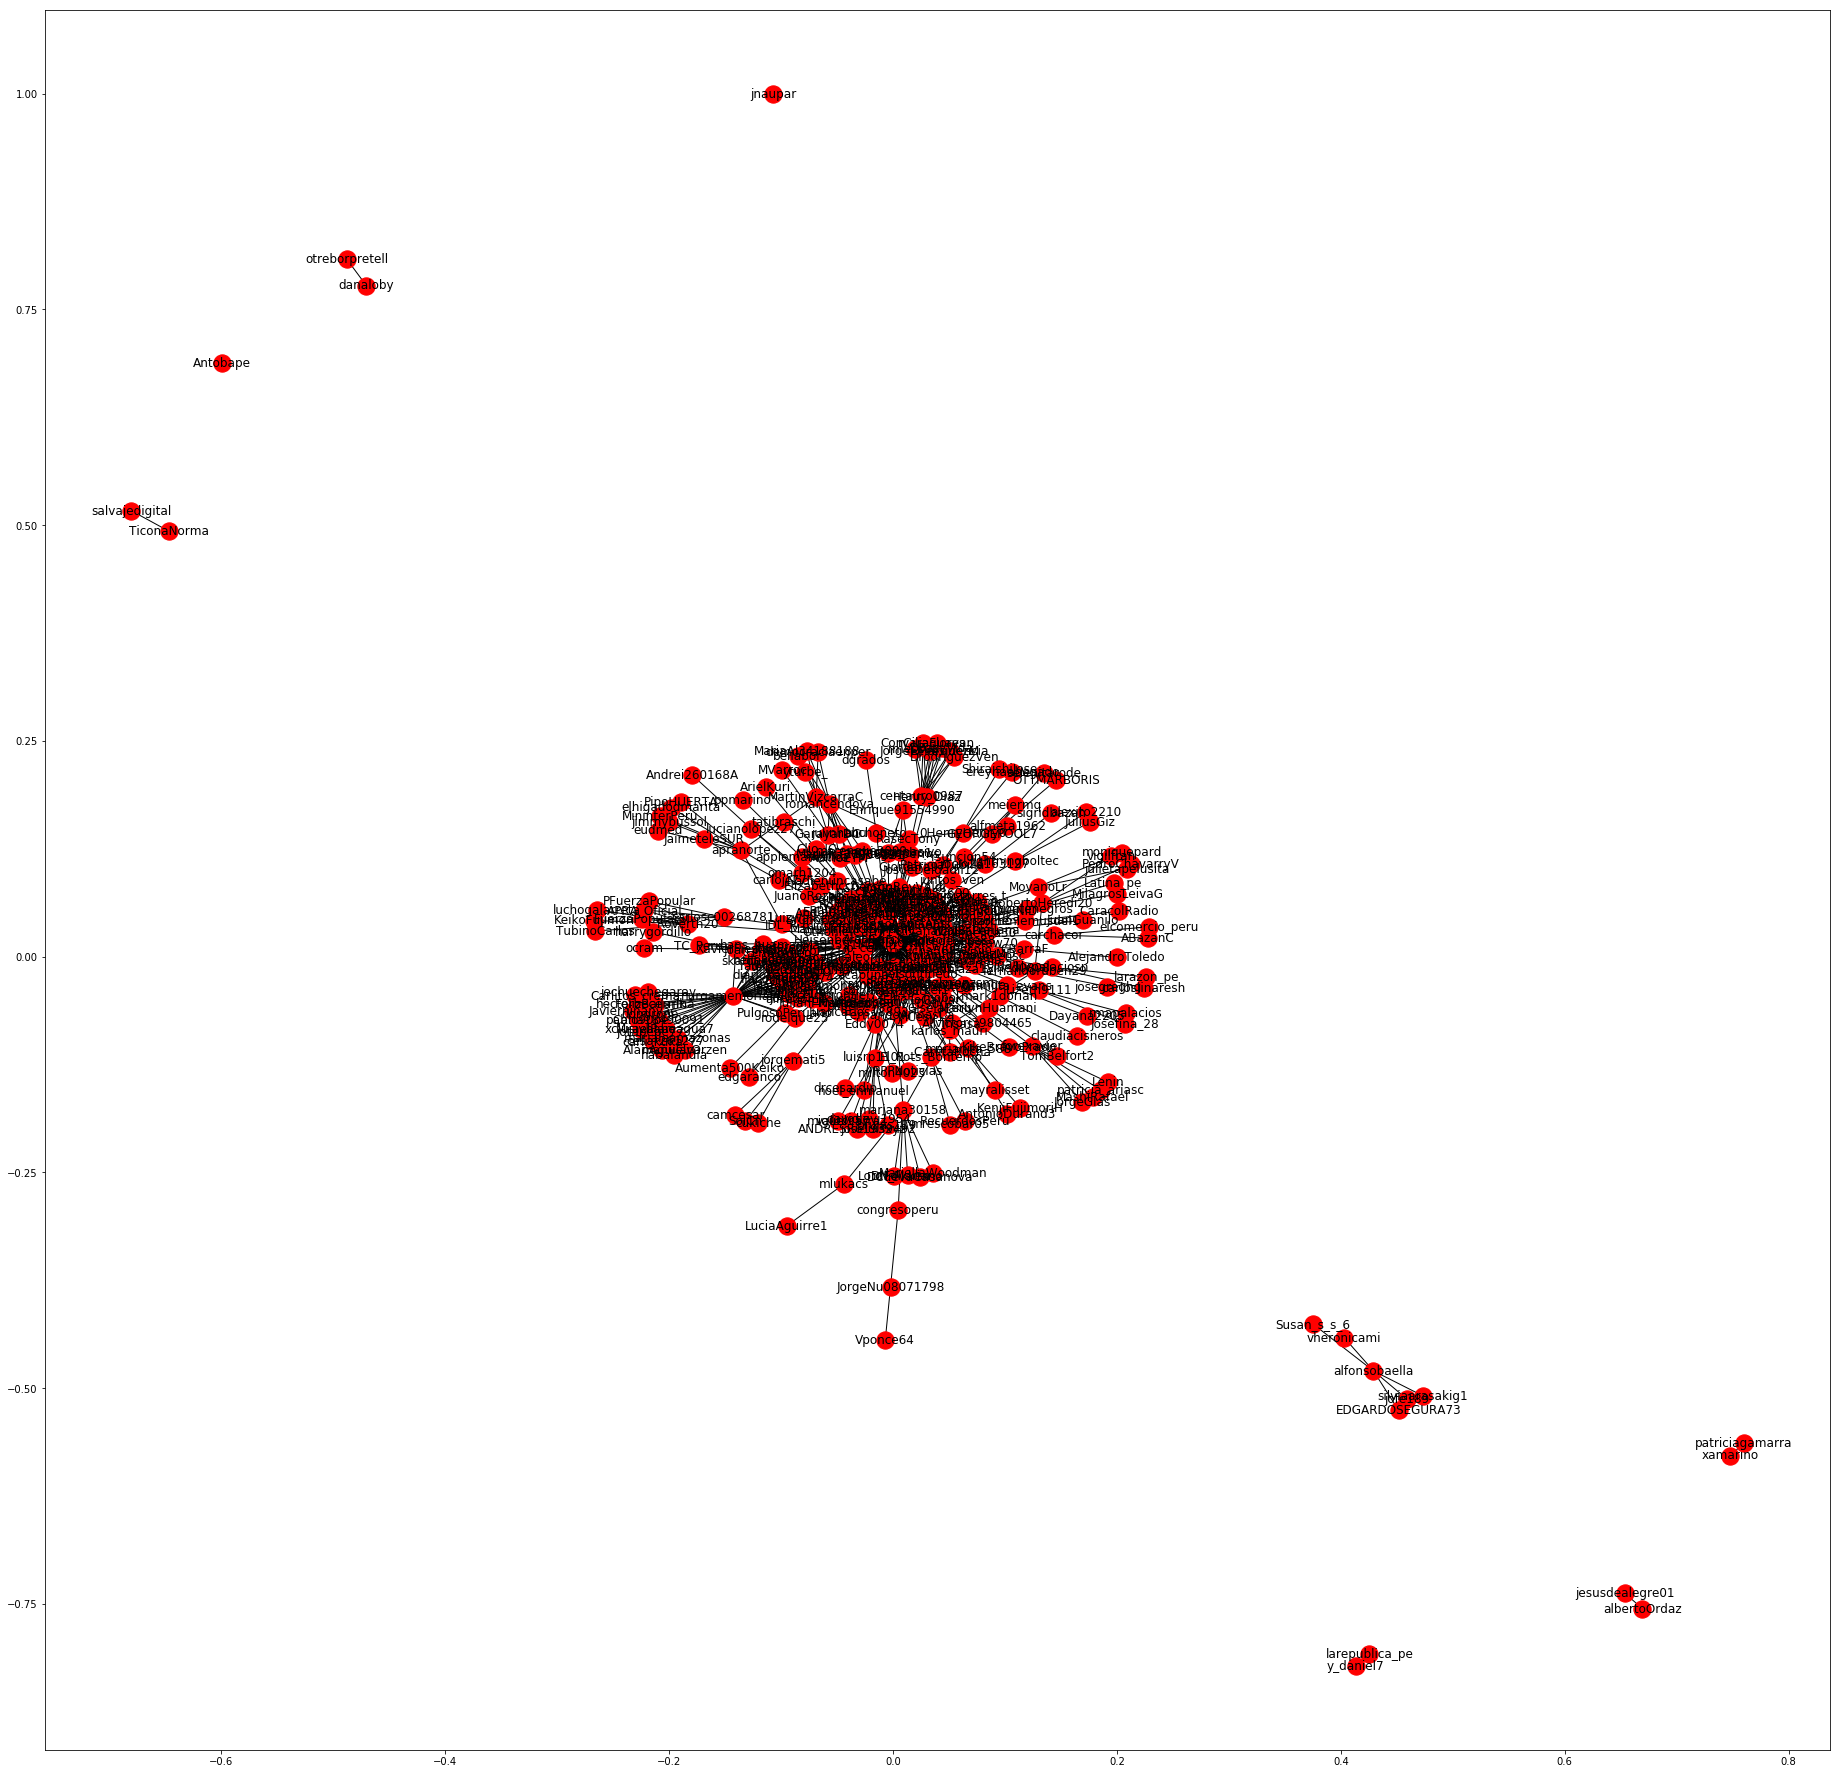

In [28]:
at.main()

Término de búsqueda: @AlanGarciaPeru


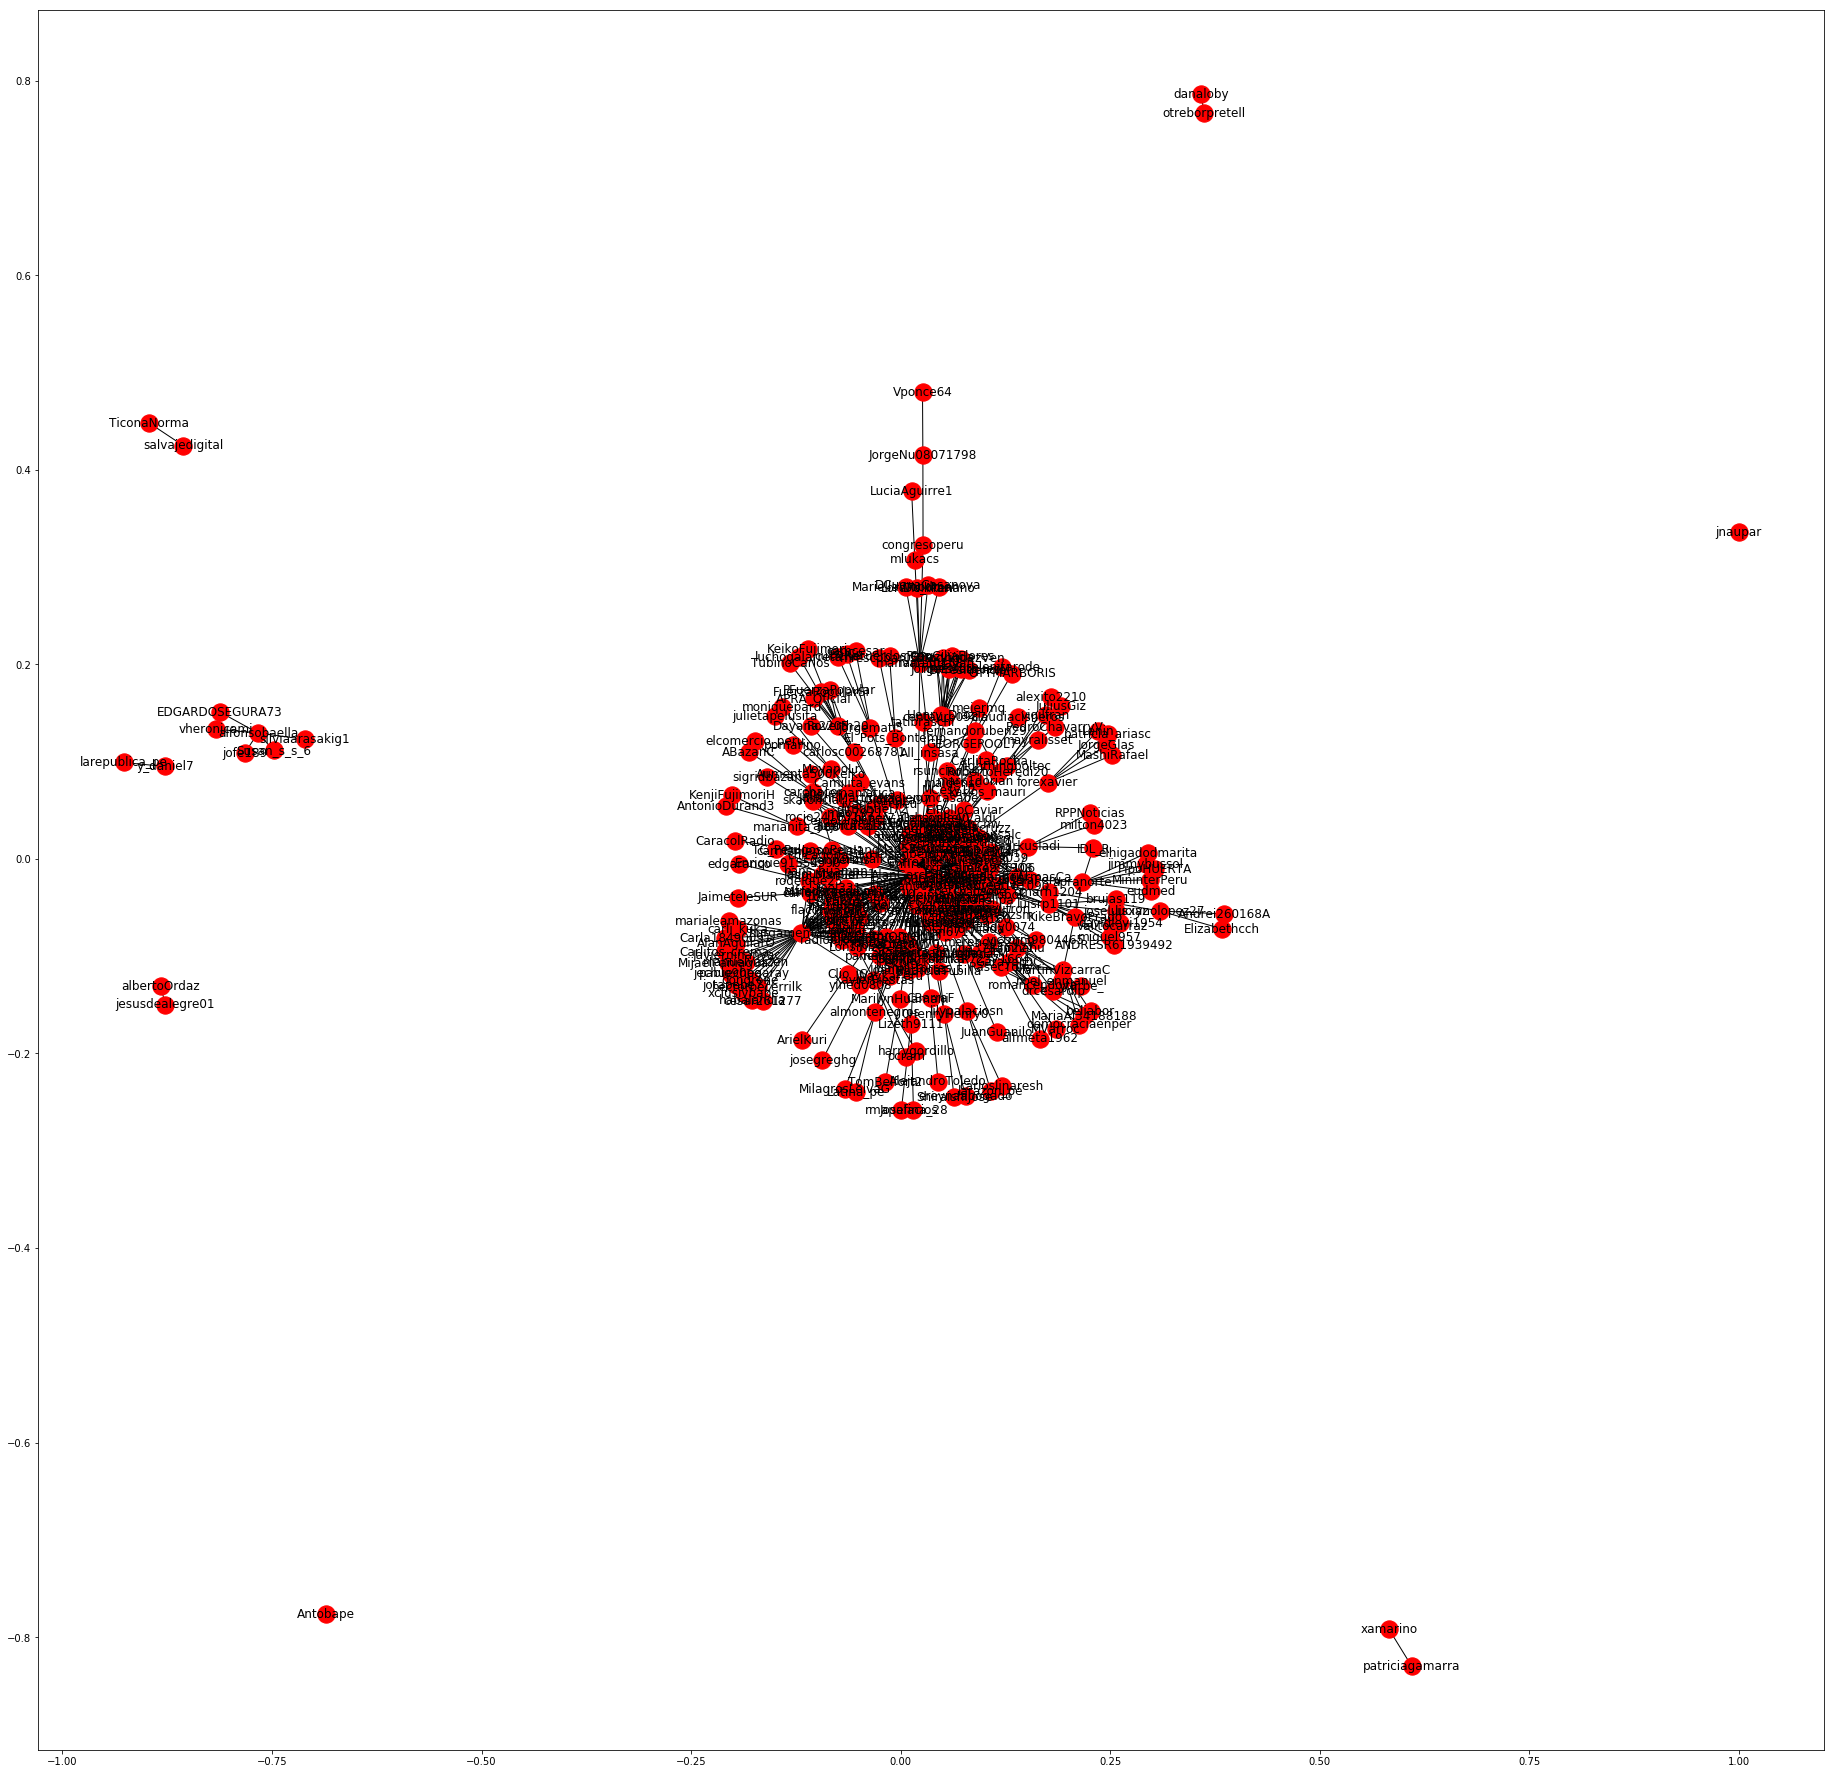

In [27]:
texto = at.main()

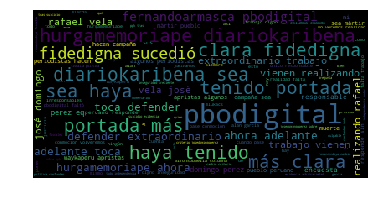

In [29]:
at.nube(texto)

## Conclusiones

Los resultados presentan diferentes soluciones en cuanto al análisis de contenido en twitter a partir de diferentes librerias de Python, la interpretación de ellos es a juicio de los lectores y espera ser una aproximación inicial para que permita involucrarlos en la exploración de los datos en redes sociales como parte del estudio sobre el comportamiento de las audiencias y los fenómenos sociales. 

# Referencias

1. [Documentación oficial de Tweepy](http://tweepy.readthedocs.io/en/v3.5.0/).
2. [Documentación oficial de NumPy](https://docs.scipy.org/doc/numpy-dev/index.html).
3. [Documentación oficial de Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html).
4. [Documentación oficial de Matplotlib](http://matplotlib.org/index.html).
5. [Sitio oficial de Seaborn](https://seaborn.pydata.org/).
6. [Documentación oficial de TextBlob](https://textblob.readthedocs.io/en/dev/).
7. [Creación de clasificadores con TextBlob](https://textblob.readthedocs.io/en/dev/classifiers.html).